## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [6]:
import pandas as pd

Heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
Heart = Heart.dropna()


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [8]:
from sklearn.linear_model import LogisticRegression


X = Heart[['age', 'chol']]
y = Heart['diagnosis']

log_mod = LogisticRegression()
log_mod.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
b0_log = log_mod.intercept_[0]
b_age_log, b_chol_log = log_mod.coef_[0]

In [22]:
chol_50 = -(b0_log + b_age_log * 55) / b_chol_log
chol_50

np.float64(367.87488979862)

A 55 year old would have to have a cholestorol of 367.87 for the doctors to predict heart disease is present. 

In [23]:
import numpy as np

logit_90 = np.log(0.9 / 0.1)        # log( p / (1-p) ) with p = 0.9
chol_90 = (logit_90 - b0_log - b_age_log * 55) / b_chol_log
chol_90

np.float64(1587.7158792752625)

The cholestorol has to be up to 1587.7158792752625 for 90%

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

X = Heart[['age', 'chol']]
y = Heart['diagnosis']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)


,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [24]:
b_age_lda, b_chol_lda = lda.coef_[0]
b0_lda = lda.intercept_[0]


In [25]:
chol_threshold = -(b0_lda + b_age_lda * 55) / b_chol_lda
chol_threshold

np.float64(368.23535752993814)

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

368.23535752993814

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [15]:
from sklearn.svm import SVC
import numpy as np

X = Heart[['age', 'chol']]
y = Heart['diagnosis']

# Try a few C values and pick the best using accuracy
Cs = [0.01, 0.1, 1, 10, 100]
best_C = None
best_score = -1

for c in Cs:
    svc_temp = SVC(kernel='linear', C=c)
    svc_temp.fit(X, y)
    score = svc_temp.score(X, y)
    if score > best_score:
        best_score = score
        best_C = c

# Fit final model
svc = SVC(kernel='linear', C=best_C)
svc.fit(X, y)


,C,0.01
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
b_age_svc, b_chol_svc = svc.coef_[0]
b0_svc = svc.intercept_[0]

In [27]:
chol_threshold = -(b0_svc + b_age_svc * 55) / b_chol_svc
chol_threshold

np.float64(312.71306926698696)

312.71306926698696

In [43]:
print(b0_log, b_age_log, b_chol_log)


-3.2401122588587943 0.046863306130360695 0.0018012385190293624


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

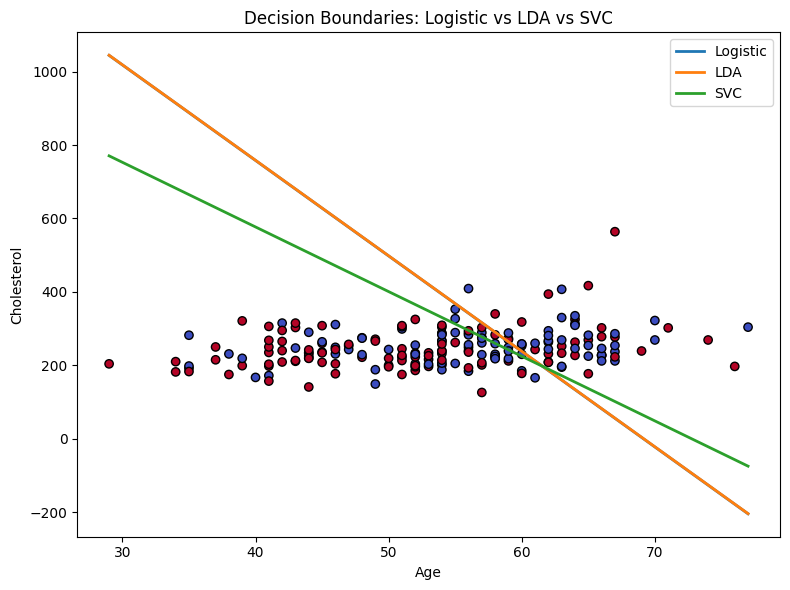

In [45]:
import numpy as np
import matplotlib.pyplot as plt

color_vals = (Heart['diagnosis'] == "Disease").astype(int)

ages = np.linspace(Heart['age'].min(), Heart['age'].max(), 200)


chol_log = -(b0_log + b_age_log * ages) / b_chol_log
chol_lda = -(b0_lda + b_age_lda * ages) / b_chol_lda
chol_svc = -(b0_svc + b_age_svc * ages) / b_chol_svc

plt.figure(figsize=(8,6))
plt.scatter(Heart['age'], Heart['chol'], c=color_vals, cmap='coolwarm', edgecolor='k')

plt.plot(ages, chol_log, label='Logistic', linewidth=2)
plt.plot(ages, chol_lda, label='LDA', linewidth=2)
plt.plot(ages, chol_svc, label='SVC', linewidth=2)

plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Decision Boundaries: Logistic vs LDA vs SVC")
plt.legend()
plt.tight_layout()
plt.show()



